# **PREDICTION OF DEFAULT OF CREDIT CARD**

**Content**

There are 25 variables

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT(New Taiwanese) dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

AGE: Age in years

PAY_0: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,...8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August 2005 (scale same as above)

PAY_3: Repayment status in July 2005 (scale same as above)

PAY_4: Repayment status in June 2005 (scale same as above)

PAY_5: Repayment status in May 2005 (scale same as above)

PAY_6: Repayment status in April 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April 2005 (NT dollar)

default.payment.next.month: Default payment(1=yes, 0=no)



In [114]:
from google.colab import files
a = files.upload( )

Saving UCI_Credit_Card.csv to UCI_Credit_Card (3).csv


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [117]:
df.head( )

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [118]:
df.shape

(30000, 25)

In [119]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [120]:
df.info() # we find out that there are no missing values in any columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [121]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [122]:
df.isnull().sum() # we don't have any null values

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [123]:
df['default.payment.next.month'].value_counts()
 # 0 for NO default payment
 # 1 for default payment

,count
default.payment.next.month,
0,23364
1,6636


**EXPLORATORY DATA ANALYSIS**

CountPlot: default.payment.next.month

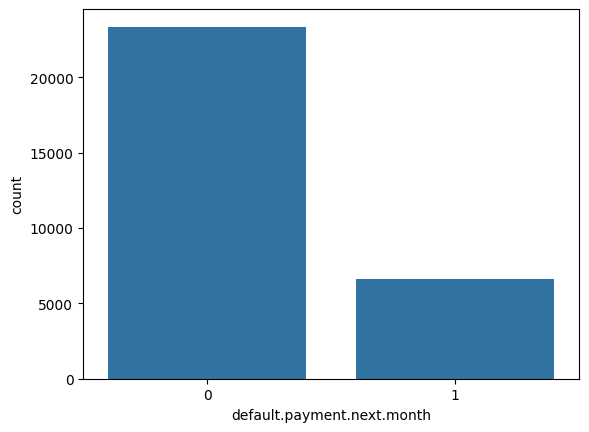

In [124]:
sns.countplot(x='default.payment.next.month',data=df)
plt.show()

Countplot: Sex

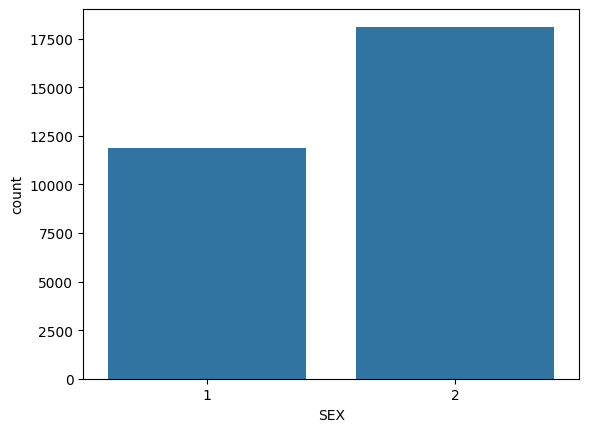

In [125]:
sns.countplot(x='SEX',data=df)
plt.show()

CountPlot: default.payment.next.month along with SEX

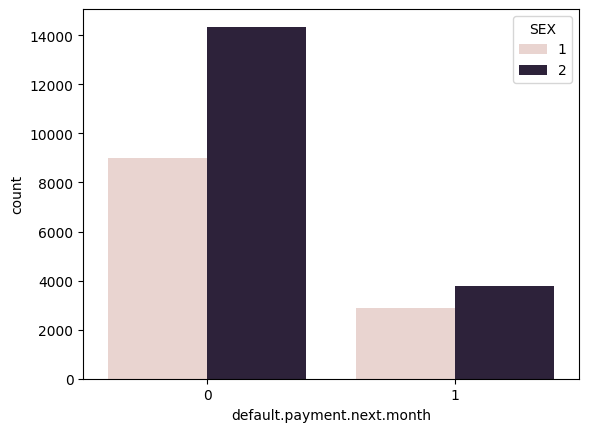

In [126]:
sns.countplot(x='default.payment.next.month', hue='SEX', data=df)
plt.show()

DISTRIBUTION PLOT

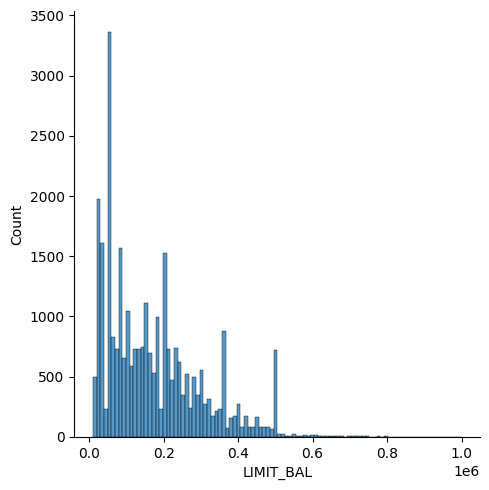

In [127]:
sns.displot(x='LIMIT_BAL',data=df,bins=100)

<Axes: >

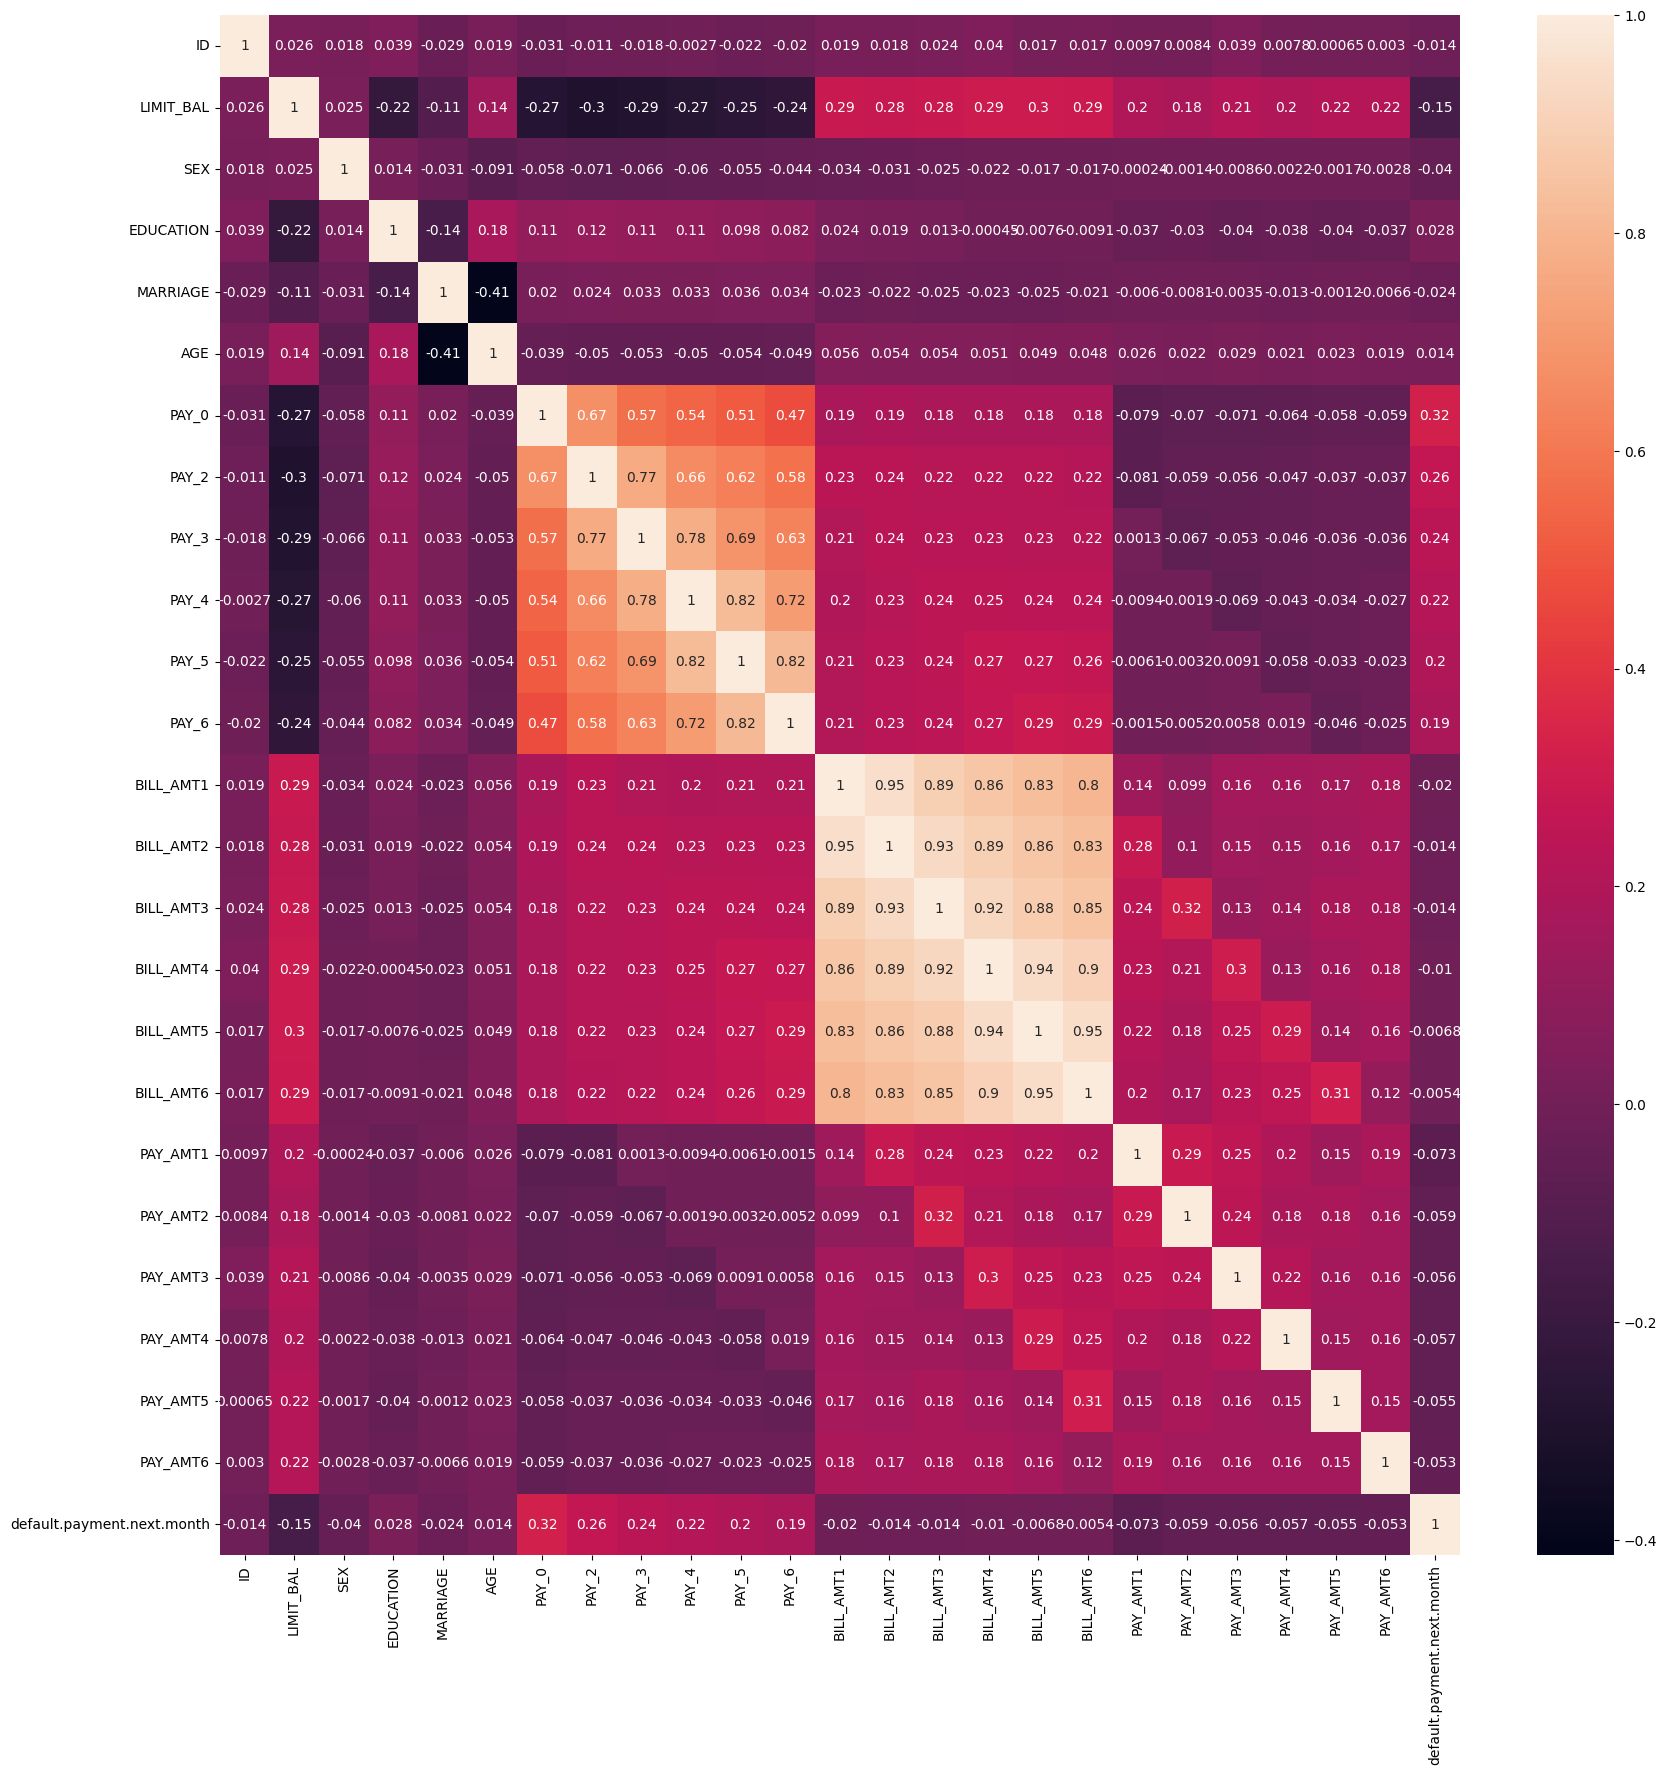

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Split into fearures (X) and label (Y)

In [129]:
X=df.drop(['default.payment.next.month'],axis=1)
Y=df['default.payment.next.month']

In [130]:
X.shape,Y.shape

((30000, 24), (30000,))

Correlation between features and the label

<Axes: title={'center': 'Correlation with response variable'}>

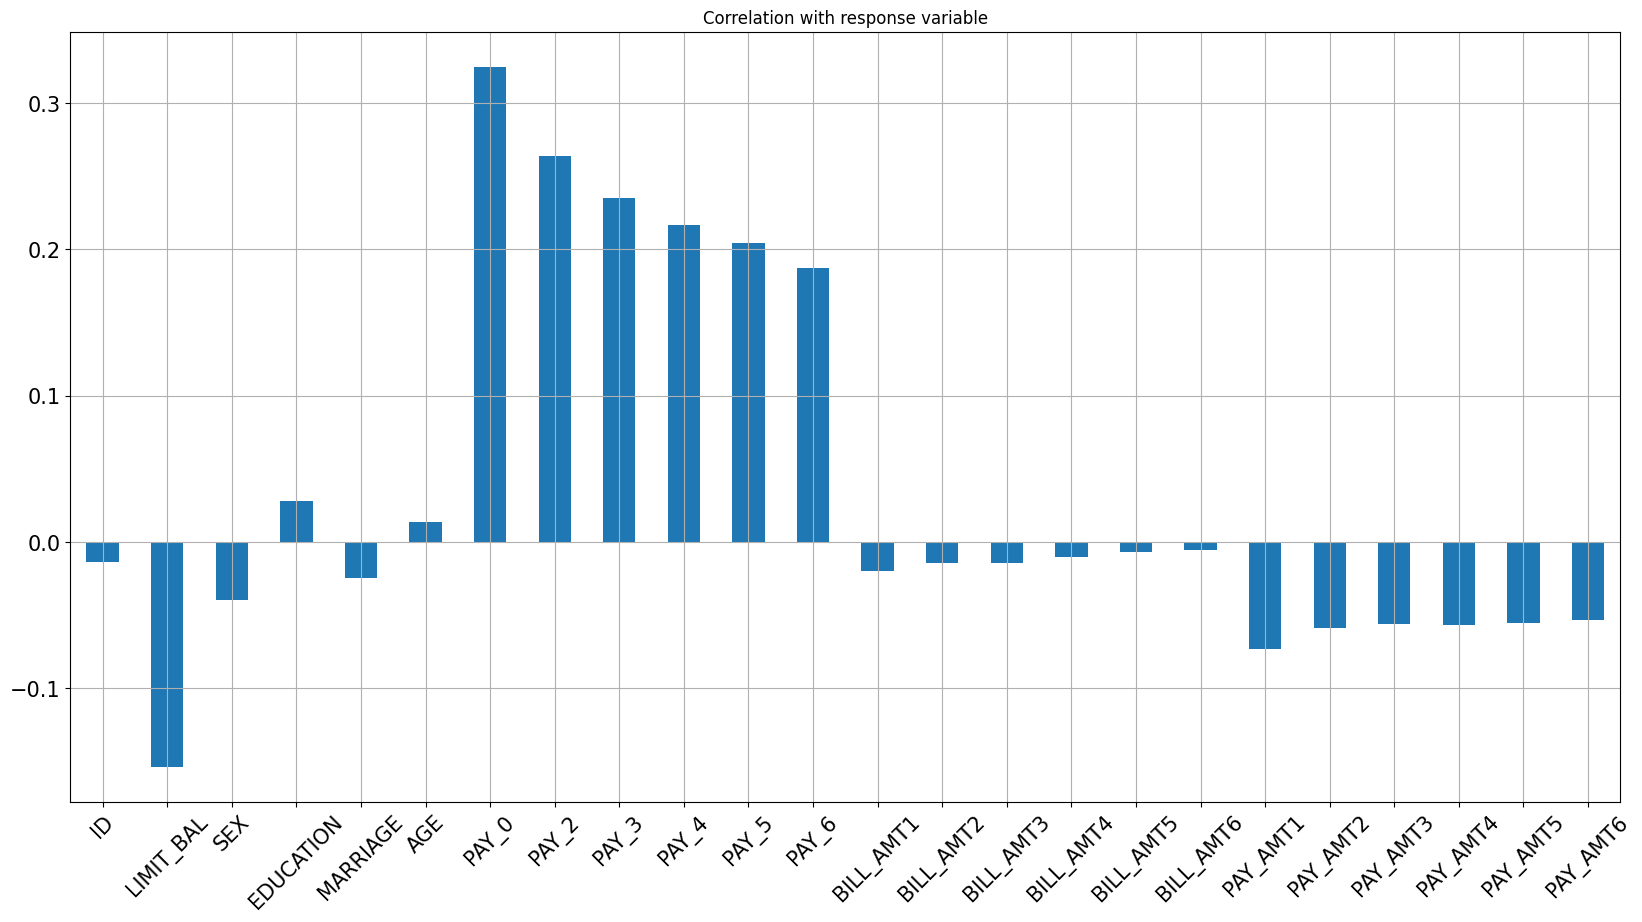

In [131]:
X.corrwith(Y).plot.bar(figsize=(20,10),
                        title="Correlation with response variable",
                       fontsize=15,rot=45,grid=True)

Feature Selection

The ID column is only a unique identifier and does not carry predictive information, so it is removed. All other features are retained as they capture customers’ credit limits, payment behavior, billing history, and demographic characteristics, which are useful for modeling default risk.

In [132]:
X_new=X.drop(['ID'],axis=1)

Split Data for training and testing

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)


Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


**IMPLEMENTING MODEL**

Implementing **LOGISTIC REGRESSION**

Train the model

In [135]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Predictions

In [136]:
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

Evaluate the model

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Confusion Matrix:


<Axes: >

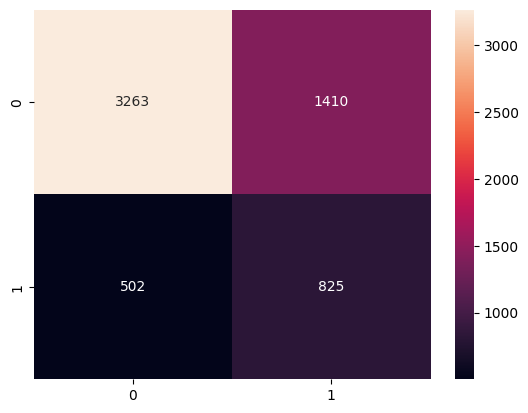

In [138]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [139]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



In [140]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.708464231420669


Implementing **RANDOM FOREST CLASSIFIER**

Train the model

In [141]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       n_jobs=-1, random_state=42)

Predictions

In [142]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_prob > 0.45).astype(int)


Evaluate the model

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Confusion Matrix:


<Axes: >

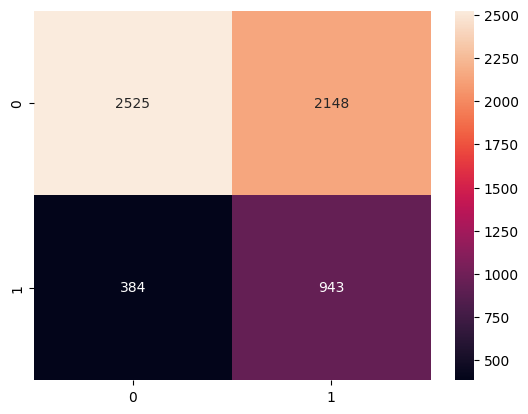

In [144]:
print("Confusion Matrix:")
cm= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm,annot=True,fmt='d')

In [145]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67      4673
           1       0.31      0.71      0.43      1327

    accuracy                           0.58      6000
   macro avg       0.59      0.63      0.55      6000
weighted avg       0.74      0.58      0.61      6000



By adjusting the probability threshold to 0.45 (standard is 0.5), the Random Forest model achieved a recall of 0.71 for defaulters, significantly improving risk detection.

In [146]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

ROC-AUC Score: 0.7749343621448618


CONCLUSION

Recall and ROC-AUC were prioritized over other Evaluation metrices because the dataset is imbalanced and missing defaulters is more important than flagging safe customers.

Recall focuses on catching defaulters and ROC-AUC measures how well the model separates defaulters and non-defaulters, it is not affected by class imbalance.